In [208]:
import pandas as pd
from pymongo import MongoClient
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.impute import SimpleImputer
import re
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from itertools import chain
import ast
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [209]:
df=pd.read_csv("C:/Users/vishn/OneDrive/Desktop/Job market prediction/Pre-process-scrap.csv")

In [210]:
col_drop=['Unnamed: 0','Rating','High_skills','Low_skills']
df.drop(columns=col_drop, inplace=True)

In [211]:
df.rename(columns={
    'Jobs_Group': 'Job_Title',
    'Profile': 'position',
    'Remote': 'Work Location',
    'Mean_Salary': 'Salary',
}, inplace=True)

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146392 entries, 0 to 146391
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Job_Title        146392 non-null  object 
 1   position         146392 non-null  object 
 2   Work Location    56993 non-null   object 
 3   Company          146392 non-null  object 
 4   State            133817 non-null  object 
 5   Salary           146392 non-null  float64
 6   Skills           146392 non-null  object 
 7   Job_description  146392 non-null  object 
dtypes: float64(1), object(7)
memory usage: 8.9+ MB


In [213]:
df.shape

(146392, 8)

In [214]:
df.sample()

,Job_Title,position,Work Location,Company,State,Salary,Skills,Job_description
74102,Data Engineer,Senior,NaN,Rivian,CA,195600.0,"['Spark', 'Python', 'SQL', 'AWS']",Create and maintain data documentation and met...


In [215]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146392 entries, 0 to 146391
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Job_Title        146392 non-null  object 
 1   position         146392 non-null  object 
 2   Work Location    56993 non-null   object 
 3   Company          146392 non-null  object 
 4   State            133817 non-null  object 
 5   Salary           146392 non-null  float64
 6   Skills           146392 non-null  object 
 7   Job_description  146392 non-null  object 
dtypes: float64(1), object(7)
memory usage: 8.9+ MB


,Salary
count,146392.000000
mean,106601.782651
std,45186.032109
min,15.260000
25%,75440.000000
50%,98282.750000
75%,128505.600000
max,600000.000000


In [216]:
df.isnull().sum()

Job_Title              0
position               0
Work Location      89399
Company                0
State              12575
Salary                 0
Skills                 0
Job_description        0
dtype: int64

### Respective Encoding techniques for columns

#### Retrieving the most frequent comapnies to avoid more categories

In [217]:
top_companies = df['Company'].value_counts().nlargest(50).index

# Filter the DataFrame to include only rows with the top 15 companies
df_top_companies = df[df['Company'].isin(top_companies)]

In [218]:
df=df_top_companies

In [219]:
df.shape

(12448, 8)

In [220]:
df.sample(2)

,Job_Title,position,Work Location,Company,State,Salary,Skills,Job_description
61520,Financial Analyst,Senior,Hybrid,HCSC,IL,68280.0,"['Teradata', 'Tableau', 'Salesforce', 'Power B...",Support financial audits and compliance.
23548,Business Analyst,Lead,NaN,"Fiserv, Inc.",NE,110400.0,['Bachelor'],Monitor and evaluate project performance and o...


In [221]:
df['Company'].value_counts()

Company
JPMorgan Chase & Co                          664
Amazon.com Services LLC                      603
Apple                                        596
Lockheed Martin                              525
Booz Allen Hamilton                          464
Deloitte                                     446
Citi                                         371
Walmart                                      305
CVS Health                                   293
HCA Healthcare                               292
Wells Fargo                                  289
JPMorgan Chase Bank, N.A.                    278
Capital One                                  272
Google                                       267
Thermo Fisher Scientific                     264
Capgemini                                    252
CACI                                         241
Leidos                                       236
TikTok                                       231
Cognizant Technology Solutions               228
Meta        

In [222]:
df.shape

(12448, 8)

In [223]:
df.columns

Index(['Job_Title', 'position', 'Work Location', 'Company', 'State', 'Salary',
       'Skills', 'Job_description'],
      dtype='object')

In [224]:
df.isnull().sum()

Job_Title             0
position              0
Work Location      8286
Company               0
State               352
Salary                0
Skills                0
Job_description       0
dtype: int64

In [225]:
df.sample()

,Job_Title,position,Work Location,Company,State,Salary,Skills,Job_description
94497,Data Engineer,Lead,NaN,Apple,CA,117591.6,"['Python', 'PhD', 'Machine Learning', 'Deep Le...",Implement data security measures and compliance.


In [226]:
### Skills Column

In [227]:
# Convert string representations of lists to actual lists
import ast

df['Skills'] = df['Skills'].apply(ast.literal_eval)

In [228]:
# Flatten the list of lists and count occurrences
all_skills = [skill for sublist in df['Skills'] for skill in sublist]
skill_counts = Counter(all_skills)

# Define high and low skills (example criteria)
high_skill_threshold = 250
high_skills = set(skill for skill, count in skill_counts.items() if count >= high_skill_threshold)
low_skills = set(skill for skill, count in skill_counts.items() if count < high_skill_threshold)



In [229]:
print(f"High skills: {high_skills}")
print(f"Low skills: {low_skills}")

High skills: {'Machine Learning', 'Dynamics 365', 'Agile', 'AWS', 'Google Cloud', 'Access', 'Docker', 'VBA', 'SQL', 'R', 'MBA', 'PowerPoint', 'English', 'Bachelor', 'Excel', 'Snowflake', 'JavaScript', 'Master', 'Jira', 'Word', 'Databricks', 'Tensor Flow', 'PhD', 'Python', 'Artificial Intelligence', 'Oracle', 'Spark', 'SAP', 'Azure', 'C++', 'Office', 'CPA', 'Teradata', 'Java', 'Tableau', 'ERP', 'Hadoop', 'Power BI', 'Deep Learning'}
Low skills: {'Matlab', 'Fabric', 'Pandas', 'NumPy', 'QuickBooks', 'Jupyter', 'Sage', 'CSS', 'C#', 'SSAS', 'French', 'German', 'Matplotlib', 'PHP', 'Streamlit', 'Russian', 'Rust', 'Power Apps', 'Neural Network', 'Chinese', 'Power Query', 'Seaborn', 'Looker', 'SAP Analytics Cloud', 'Polars', 'DAX', 'Angular', 'MongoDB', 'D3', 'Snaplogic', 'Japanese', 'HTML', 'Salesforce', 'SciKit', 'ABAP', 'DOMO', 'Hyperion', 'Essbase', 'Plotly', 'Cognos', 'CFA', 'Kaggle', 'Chat GPT', 'SSIS', '.NET', 'Power Automate', 'Google Sheets', 'Power Pivot', 'Spanish', 'Navision', 'CMA

In [230]:
# Create new columns for counting high and low skills
def count_skills(skills_list, high_skills, low_skills):
    count_high = sum(1 for skill in skills_list if skill in high_skills)
    count_low = sum(1 for skill in skills_list if skill in low_skills)
    return pd.Series([count_high, count_low])

df[['High_skills', 'Low_skills']] = df['Skills'].apply(
    lambda skills: count_skills(skills, high_skills, low_skills)
)

In [231]:
df['High_skills'].value_counts()

High_skills
3     1887
4     1776
2     1676
5     1647
1     1326
6     1305
7      822
8      582
9      408
0      358
10     266
11     191
12      92
13      52
14      32
15      19
16       5
17       3
18       1
Name: count, dtype: int64

In [232]:
value_counts = df['High_skills'].value_counts()

# Step 2: Get skills with counts >= 100
valid_skills = value_counts[value_counts >= 100].index

# Step 3: Filter the DataFrame
df_filtered = df[df['High_skills'].isin(valid_skills)]
df=df_filtered

In [233]:
value_countss = df['Low_skills'].value_counts()

# Step 2: Get skills with counts >= 100
valid_low_skills = value_countss[value_countss >= 200].index

# Step 3: Filter the DataFrame
df_filtered = df[df['Low_skills'].isin(valid_low_skills)]
df=df_filtered

In [234]:
df.shape

(11986, 10)

In [235]:
median_salaries = df.groupby('position')['Salary'].median()

# Function to assign tenure and total experience based on position, salary and median salary
def assign_tenure_total_experience(row):
    median_salary = median_salaries[row['position']]
    if row['Salary'] < median_salary:
        if row['position'] == 'Junior':
            tenure = 1
            total_experience = 1
        elif row['position'] == 'Senior':
            tenure = 3
            total_experience = 3 + tenure * 0.5
        elif row['position'] == 'Lead':
            tenure = 5
            total_experience = 5 + tenure * 0.5
    else:
        if row['position'] == 'Junior':
            tenure = 2
            total_experience = 2 + 1
        elif row['position'] == 'Senior':
            tenure = 4
            total_experience = 4 + tenure * 0.5 + 1
        elif row['position'] == 'Lead':
            tenure = 6
            total_experience = 6 + tenure * 0.5 + 2
    return pd.Series([tenure, total_experience])

# Apply function to create new columns
df[['Tenure', 'Total_Experience']] = df.apply(assign_tenure_total_experience, axis=1)

In [236]:
df['Tenure'] = df['Tenure'].astype(int)
df['Total_Experience'] = df['Total_Experience'].astype(int)

In [237]:
def determine_employment_type(row):
    if row['Job_Title'] in ['Data Scientist', 'ML/AI Engineer', 'CFO', 'Financial Analyst', 'Data Engineer']:
        if row['position'] in ['Senior', 'Lead'] and row['Tenure'] > 1:
            return 'Full-Time'
        elif row['Tenure'] <= 1 and row['Total_Experience'] > 2:
            return 'Contract'
    elif row['position'] in ['Junior'] and row['Tenure'] < 1:
        return 'Part-Time'
    elif row['Job_Title'] in ['Business Intelligence', 'Operations Analyst', 'Analyst'] and row['Tenure'] <= 1:
        return 'Contract'
    else:
        return 'Others'

# Apply the function to create the Employment_Type column
df['Employment_Type'] = df.apply(determine_employment_type, axis=1)


In [238]:
df['State'].value_counts()

State
CA    1558
VA    1335
TX     974
NY     847
WA     839
FL     720
IL     580
NJ     401
MD     391
NC     328
PA     294
MO     294
MA     289
TN     282
DC     272
CO     260
OH     225
GA     201
DE     180
AR     161
AZ     132
WI     115
MN     107
CT      99
IN      92
UT      89
RI      79
NE      76
SC      60
NH      51
AL      49
KY      38
OR      38
OK      35
IA      27
NM      20
MI      19
NV      15
KS      15
LA      13
HI      13
ID       7
PR       7
MS       6
SD       5
GU       4
MT       2
ME       2
WV       2
AK       1
ND       1
Name: count, dtype: int64

In [239]:
df.sample()

,Job_Title,position,Work Location,Company,State,Salary,Skills,Job_description,High_skills,Low_skills,Tenure,Total_Experience,Employment_Type
1894,Operations Analyst,Lead,Hybrid,JPMorgan Chase & Co,OH,108175.0,"[Tableau, VBA, Access, Excel, Office, SQL]",Develop and implement strategies for operation...,6,0,5,7,Others


In [240]:
df['Job_Title'].value_counts()

Job_Title
Data Engineer                1900
Business Analyst             1865
Financial Analyst            1772
Data Analyst                 1322
Data Scientist               1298
ML/AI Engineer                935
Analyst                       662
Business Intelligence         602
Operations Analyst            540
Others                        427
CFO                           262
Controller                    213
Finance                       162
Statistician/Mathemathics      26
Name: count, dtype: int64

In [241]:
state_counts = df['State'].value_counts()

# Identify states with counts less than 400
states_less_than_400 = state_counts[state_counts < 300].index

# Identify states with counts between 1000 and 2000
states_between_1000_and_2000 = state_counts[(state_counts <= 1700)].index

# Ensure there is at least one state with counts between 1000 and 2000
if len(states_between_1000_and_2000) == 0:
    raise ValueError("No states with counts between 1000 and 2000 found.")

# Select one state from the identified states
rename_to_state = states_between_1000_and_2000[0]

# Rename states with counts less than 400
df['State'] = df['State'].apply(lambda x: rename_to_state if x in states_less_than_400 else x)

In [242]:
df.sample(1)

,Job_Title,position,Work Location,Company,State,Salary,Skills,Job_description,High_skills,Low_skills,Tenure,Total_Experience,Employment_Type
69970,ML/AI Engineer,Senior,NaN,Apple,WA,126501.0,"[Python, Tensor Flow, Master, Access, Bachelor]",Develop and maintain AI systems and applications.,5,0,4,7,Full-Time


In [243]:
df['Low_skills'].value_counts()

Low_skills
0    9530
1    1946
2     510
Name: count, dtype: int64

### Removing outlier in Salary

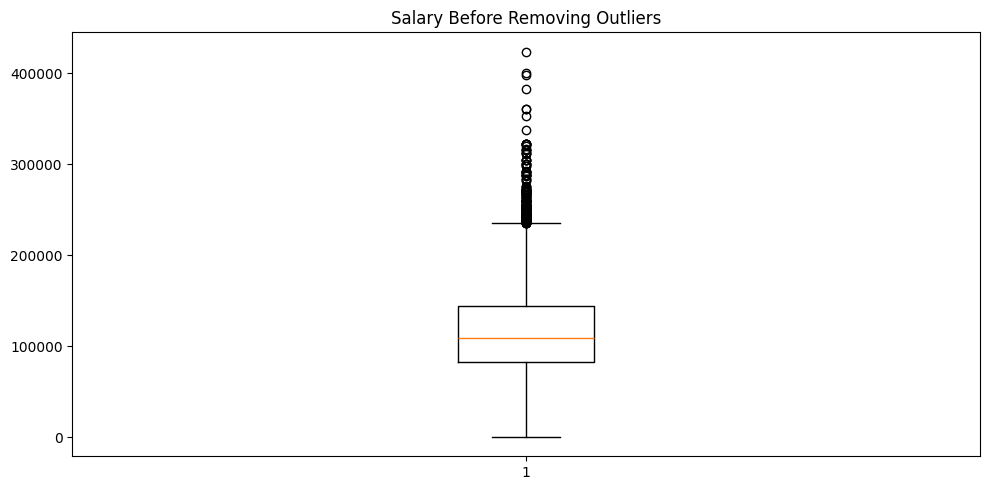

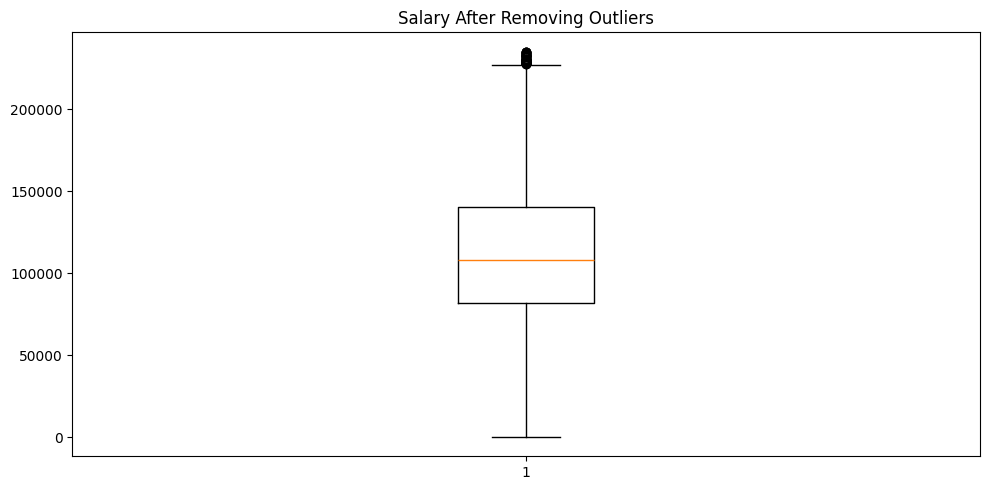

In [244]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_out = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_out

# Plotting function for boxplots
def plot_boxplots(df, columns, title):
    plt.figure(figsize=(10, 5))
    for i, column in enumerate(columns):
        plt.subplot(1, len(columns), i + 1)
        plt.boxplot(df[column])
        plt.title(f'{column} {title}')
    plt.tight_layout()
    plt.show()

# Boxplot before removing outliers
plot_boxplots(df, ['Salary'], 'Before Removing Outliers')

# Remove outliers from Salary and Rating columns
df_no_outliers = remove_outliers(df, 'Salary')


# Boxplot after removing outliers
plot_boxplots(df_no_outliers, ['Salary'], 'After Removing Outliers')



In [245]:
df=df_no_outliers

### Pre Processing Text

In [246]:
df['Job_description'].sample(1)

20243    Develop business requirements and functional s...
Name: Job_description, dtype: object

In [247]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


In [248]:
# Text Preprocessing
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vishn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vishn\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [249]:
def preprocess_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]  # Remove stop words and lemmatize
    return ' '.join(tokens)

df['cleaned_job_description'] = df['Job_description'].apply(preprocess_text)


C:\Users\vishn\AppData\Local\Temp\ipykernel_18484\790894793.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned_job_description'] = df['Job_description'].apply(preprocess_text)


In [250]:
# Feature Extraction using TF-IDF
tfidf = TfidfVectorizer(max_features=100)  # Limiting to top 100 features for simplicity
X_tfidf = tfidf.fit_transform(df['cleaned_job_description']).toarray()


In [251]:
# Adding extracted features to DataFrame
tfidf_df = pd.DataFrame(X_tfidf, columns=tfidf.get_feature_names_out())

In [252]:
df.sample()

,Job_Title,position,Work Location,Company,State,Salary,Skills,Job_description,High_skills,Low_skills,Tenure,Total_Experience,Employment_Type,cleaned_job_description
51487,Analyst,Lead,NaN,NYC Careers,NY,85749.6,"[Access, HTML]",Identify trends and anomalies in data sets.,1,1,5,7,Others,identify trend anomaly data set


In [253]:
df.isnull().sum()

Job_Title                     0
position                      0
Work Location              7851
Company                       0
State                       334
Salary                        0
Skills                        0
Job_description               0
High_skills                   0
Low_skills                    0
Tenure                        0
Total_Experience              0
Employment_Type             231
cleaned_job_description       0
dtype: int64

### Id feature follows Normal distribution use(standardisation)

In [254]:
# Calculate skewness and kurtosis for the temporary DataFrame
original_skewness = stats.skew(df['Salary'])
print(original_skewness)
original_kurtosis = stats.kurtosis(df['Salary'])
print(original_kurtosis)

0.5182755920936875
-0.22531818102301981


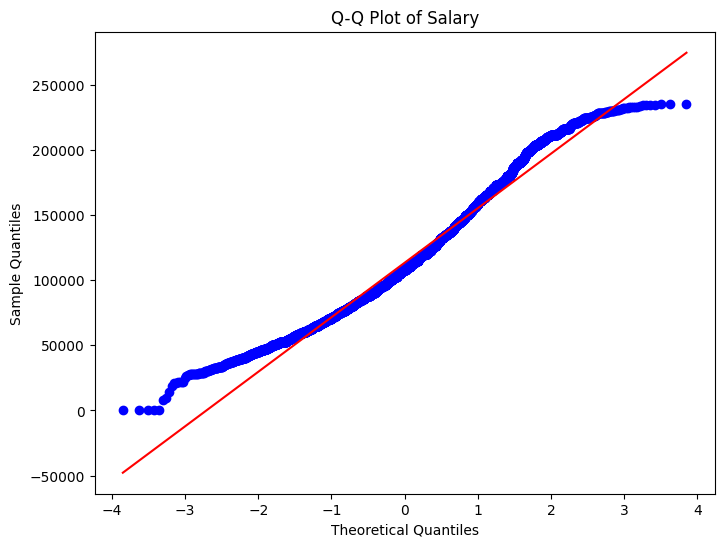

In [255]:
plt.figure(figsize=(8, 6))
stats.probplot(df['Salary'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Salary')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

In [256]:
import joblib
Scaler_sal = MinMaxScaler()
df['Salary'] = Scaler_sal.fit_transform(df[['Salary']])

# Save the scaler for later use
joblib.dump(Scaler_sal, 'Salary_scale.pkl')

C:\Users\vishn\AppData\Local\Temp\ipykernel_18484\1523884800.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Salary'] = Scaler_sal.fit_transform(df[['Salary']])


['Salary_scale.pkl']

In [257]:
import category_encoders as ce

encoder = ce.TargetEncoder(cols=['Company'])

# Fit the encoder on the training data
encoder.fit(df['Company'], df['Salary'])

# Transform the 'Company' column
df_encoded = encoder.transform(df['Company'])

# Replace the original 'Company' column with the encoded values
df['Company_Encoded'] = df_encoded['Company']

# Optionally, you can drop the original 'Company' column if no longer needed
df.drop('Company', axis=1, inplace=True)

C:\Users\vishn\AppData\Local\Temp\ipykernel_18484\716991468.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Company_Encoded'] = df_encoded['Company']
C:\Users\vishn\AppData\Local\Temp\ipykernel_18484\716991468.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Company', axis=1, inplace=True)


In [258]:
joblib.dump(encoder, 'company_target_encoder.pkl')

['company_target_encoder.pkl']

In [259]:
# Splitting data into train and test sets
X_text = tfidf_df
y_text = df['Salary']
X_tex, X_tex, y_tex, y_tex = train_test_split(X_text, y_text, test_size=0.2, random_state=42)


In [260]:
# Training the Regression Model
model = RandomForestRegressor()
model.fit(X_tex, y_tex)
# Analyzing Feature Importances
feature_importances = model.feature_importances_
feature_names = X_text.columns


In [261]:
# Create a DataFrame for feature importances
feature_importances_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})

# Select top 3 features
top_features = feature_importances_df.nlargest(3, 'importance')['feature'].tolist()
# Extract the top 3 features from the TF-IDF DataFrame
top_features_df = tfidf_df[top_features]


In [262]:
top_features_df

,data,ai,financial
0,0.000000,0.0,0.000000
1,0.000000,0.0,0.000000
2,0.000000,0.0,0.000000
3,0.000000,0.0,0.000000
4,0.000000,0.0,0.000000
...,...,...,...
11741,0.000000,0.0,0.000000
11742,0.226624,0.0,0.679229
11743,0.000000,0.0,0.000000
11744,0.000000,0.0,1.000000


In [263]:
df.drop(columns=['Job_description', 'Employment_Type','Skills', 'Work Location','cleaned_job_description'],inplace=True)

C:\Users\vishn\AppData\Local\Temp\ipykernel_18484\288658881.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Job_description', 'Employment_Type','Skills', 'Work Location','cleaned_job_description'],inplace=True)


In [264]:
df.sample()

,Job_Title,position,State,Salary,High_skills,Low_skills,Tenure,Total_Experience,Company_Encoded
43405,Data Analyst,Lead,NY,0.266615,9,0,5,7,0.381946


In [265]:
df['position'].unique()

array(['Senior', 'Lead', 'Junior'], dtype=object)

### Artificial Neural network

#### Label Encoder

In [266]:
columns_to_encode = ['Job_Title','position','State']

# Initialize a dictionary to store encoders
encoders = {}

# Encode each column
for column in columns_to_encode:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    encoders[column] = le  # Save the encoder for future use

# Save all encoders in a single file
joblib.dump(encoders, 'label_encoders.pkl')

C:\Users\vishn\AppData\Local\Temp\ipykernel_18484\2073208081.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = le.fit_transform(df[column])
C:\Users\vishn\AppData\Local\Temp\ipykernel_18484\2073208081.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = le.fit_transform(df[column])
C:\Users\vishn\AppData\Local\Temp\ipykernel_18484\2073208081.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

['label_encoders.pkl']

In [267]:
numerical_cols = ['Job_Title','position','State','High_skills', 'Low_skills', 'Tenure', 'Total_Experience','Company_Encoded']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply MinMaxScaler to the numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

joblib.dump(scaler, 'MinMaxScaler.pkl')

C:\Users\vishn\AppData\Local\Temp\ipykernel_18484\3265737577.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


['MinMaxScaler.pkl']

In [268]:
df.sample()

,Job_Title,position,State,Salary,High_skills,Low_skills,Tenure,Total_Experience,Company_Encoded
133861,0.692308,1.0,0.0,0.319056,0.545455,1.0,0.4,0.3,0.593318


In [269]:
X = df[['Job_Title','position','Company_Encoded','State', 'High_skills', 'Low_skills', 'Tenure','Total_Experience']]  # Features
y = df['Salary']  # Target variable

In [270]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

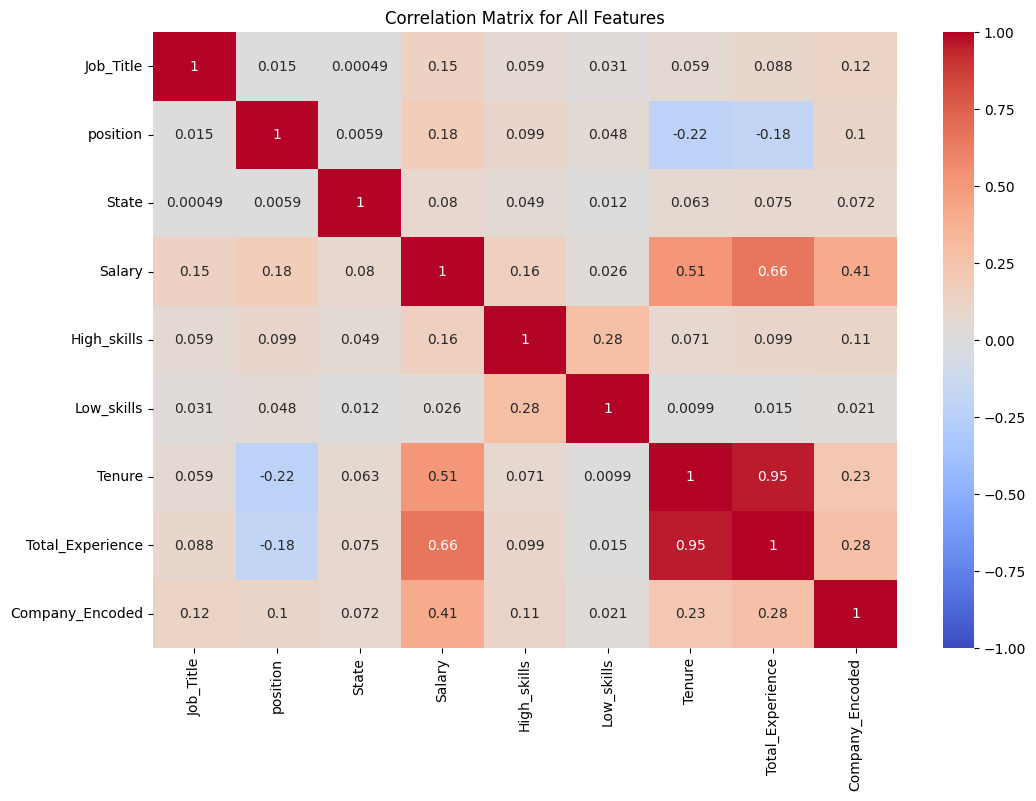

In [271]:
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for All Features')
plt.show()

### Building a ANN   

In [299]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import KFold
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, PReLU, ELU
from keras_tuner import HyperModel, RandomSearch
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.optimizers import AdamW
from kerastuner import HyperModel
from tensorflow.keras.regularizers import l2

In [306]:
class MyHyperModel(HyperModel):
    def build(self, hp):
        model = Sequential()
        model.add(Dense(units=hp.Int('units_1', min_value=32, max_value=512, step=32), 
                        activation='relu', kernel_initializer='he_normal', input_shape=(X_train.shape[1],)))
        model.add(Dropout(rate=hp.Float('dropout_1', min_value=0.0, max_value=0.5, step=0.1)))
        
        # Define the number of additional layers as a hyperparameter
        num_layers = hp.Int('num_layers', 1, 5)
        
        for i in range(num_layers):
            model.add(Dense(units=hp.Int(f'units_{i+2}', min_value=32, max_value=512, step=32), 
                            activation='relu', kernel_initializer='he_normal'))
            model.add(Dropout(rate=hp.Float(f'dropout_{i+2}', min_value=0.0, max_value=0.5, step=0.1)))
        
        model.add(Dense(units=1))
        
        model.compile(optimizer=AdamW(learning_rate=hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
              loss='mean_squared_error')
        
        return model

In [307]:
from keras.callbacks import EarlyStopping
# Instantiate the tuner
tuner = RandomSearch(
    MyHyperModel(),
    objective='val_loss',
    max_trials=15,
    executions_per_trial=1,
    directory='epoch_dir',
    project_name='helloworld'
)

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
# Run the hyperparameter search
tuner.search(X_train, y_train, epochs=75, validation_split=0.2)

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

Trial 15 Complete [00h 01m 03s]
val_loss: 0.011107333935797215

Best val_loss So Far: 0.010216513648629189
Total elapsed time: 00h 21m 05s


C:\Users\vishn\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\vishn\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\saving\saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adamw', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [293]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

y_pred = best_model.predict(X_test)

111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [301]:
# Reverse normalization for predictions and actual values


# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.009297266413383288
Mean Absolute Error: 0.07700232288923087
R-squared: 0.711905322951214


In [295]:
df.sample(2)

,Job_Title,position,State,Salary,High_skills,Low_skills,Tenure,Total_Experience,Company_Encoded
93019,0.769231,1.0,0.0,0.595168,0.181818,0.0,0.6,0.6,0.598475
71443,0.538462,0.5,0.7,0.504613,0.636364,0.0,1.0,1.0,0.598475


In [298]:
input_data = np.array([[0.076923, 0.5, 0.6,  0.545455, 0.0, 1.0, 1.0, 0.570010]])

# Predict the salary
predicted_salary = best_model.predict(input_data)

print(f"Predicted Salary: {predicted_salary[0][0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted Salary: 0.3703555762767792
